In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

1.a

In [2]:
loss_tracker = keras.metrics.Mean(name="loss") #actualiza la media de métricas relevantes en el rendimiento del entrenamiento
#establecer metodos para la red a partir de su estructura (model.sequential)
class SolucionarEc(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker
#método para entrenar la red
    def train_step(self, data):
        batch_size =100 #Calibra la resolucion, define los puntos a entrenar en la gráfica
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1) #definir los puntos y el dominio
        f = 3.*tf.math.sin(math.pi*x) #función a aproximar (etiquetas para el conjunto de datos de entrada x)

        #calculo de las parciales (y por ende la fución de costo)
        #modificamos el algoritmo de calculo dde los gradientes para hacerlo funcionar en nuestra red personalizada
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True) #calcular las predicciones (y hat)

            # Usando 'sum'
            mse = tf.keras.losses.MeanSquaredError(
                reduction=tf.keras.losses.Reduction.SUM)
            loss= mse(f, y_pred)

        grads = tape.gradient(loss, self.trainable_weights) #calcular las parcales (los gradientes de w y b)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))#aplicar la optimización (?)
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}


In [3]:
#crear instancia para el entrenamiento y la estructura de la red
modelo = SolucionarEc()
modelo.add(Dense(600,activation='tanh', input_shape=(1,)))
modelo.add(Dense(400,activation='tanh'))
modelo.add(Dense(300,activation='tanh'))
modelo.add(Dense(200,activation='tanh'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(1))

modelo.summary()

Model: "solucionar_ec"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               1200      
                                                                 
 dense_1 (Dense)             (None, 400)               240400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 442301 (1.69 MB)
Trainable params: 4423

In [4]:
modelo.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [5]:
x=tf.linspace(-1,1,100) #cargar datos de entrada para la red una vez entrenada (el rango de la función)

In [6]:
historial = modelo.fit(x,epochs=10000,verbose=0) #entrenar la red

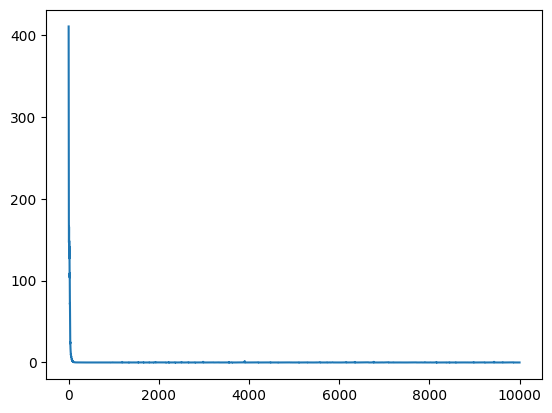

In [7]:
plt.plot(historial.history["loss"])

In [8]:
#probar la red
prueba=modelo.predict(x) #predicción para cada dato de entrada

4/4 [==============================] - 0s 4ms/step


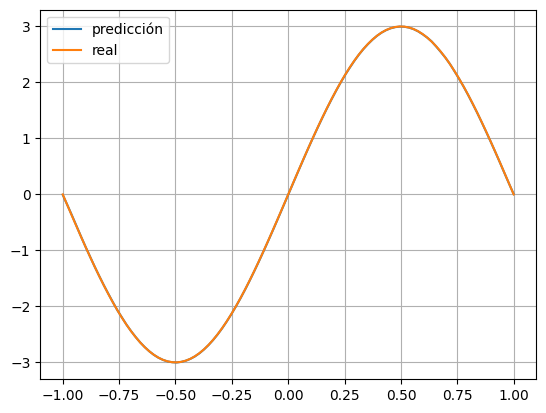

In [11]:
plt.plot(x,prueba,label="predicción") #graficar la predicción
plt.plot(x, 3.*tf.math.sin(math.pi*x), label="real") #graficar la función real

plt.legend()
plt.grid()
plt.show()

1.b

In [12]:
#lo mismo que el código anterior, solo cambiando la función
loss_tracker = keras.metrics.Mean(name="loss") #actualiza la media de métricas relevantes en el rendimiento del entrenamiento
#establecer metodos para la red a partir de su estructura (model.sequential)
class SolucionarEc(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker
#método para entrenar la red
    def train_step(self, data):
        batch_size =100 #Calibra la resolucion, define los puntos a entrenar en la gráfica
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1) #definir los puntos y el dominio
        f = 1.+2.*x+4.*x**3. #función a aproximar (etiquetas para el conjunto de datos de entrada x)

        #calculo de las parciales (y por ende la fución de costo)
        #modificamos el algoritmo de calculo dde los gradientes para hacerlo funcionar en nuestra red personalizada
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True) #calcular las predicciones (y hat)

            # Usando 'sum'
            mse = tf.keras.losses.MeanSquaredError(
                reduction=tf.keras.losses.Reduction.SUM)
            loss= mse(f, y_pred)

        grads = tape.gradient(loss, self.trainable_weights) #calcular las parcales (los gradientes de w y b)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))#aplicar la optimización (?)
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [15]:
modelob=SolucionarEc() #crear una instancia para la esttructura de la red
modelob.add(Dense(600,activation='tanh', input_shape=(1,)))
modelob.add(Dense(400,activation='tanh'))
modelob.add(Dense(300,activation='tanh'))
modelob.add(Dense(200,activation='tanh'))
modelob.add(Dense(100,activation='relu'))
modelob.add(Dense(1))

modelob.summary()

Model: "solucionar_ec_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 600)               1200      
                                                                 
 dense_19 (Dense)            (None, 400)               240400    
                                                                 
 dense_20 (Dense)            (None, 300)               120300    
                                                                 
 dense_21 (Dense)            (None, 200)               60200     
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 442301 (1.69 MB)
Trainable params: 44

In [16]:
modelob.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [17]:
x=tf.linspace(-1,1,100) #cargar datos de entrada para la red una vez entrenada (el rango de la función)

In [18]:
historial = modelob.fit(x,epochs=1000,verbose=0) #entrenar la red

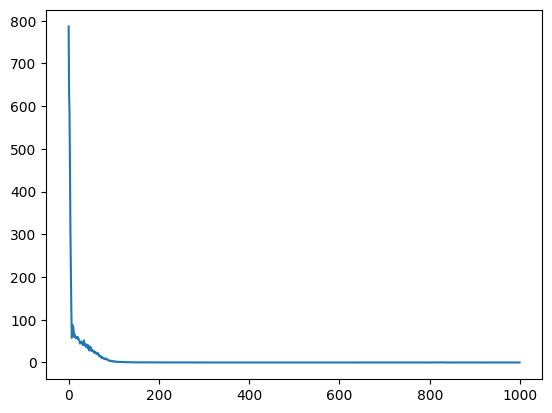

In [19]:
plt.plot(historial.history["loss"])

4/4 [==============================] - 0s 4ms/step


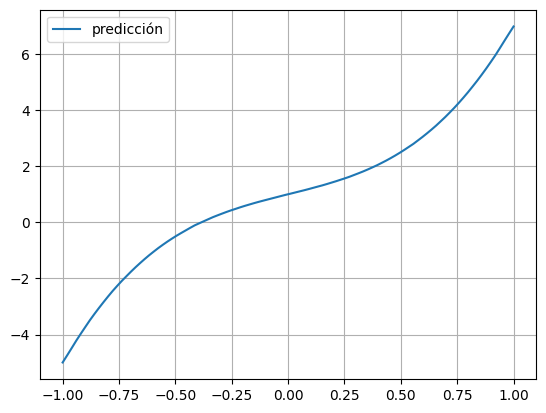

In [21]:
#probar la red
prueba=modelob.predict(x) #predicción para cada dato de entrada

#graficar resultados
plt.plot(x,prueba,label="predicción") #graficar la predicción
plt.plot(x, 1.+2.*x+4.*x**3., label="real") #graficar la función real

plt.legend()
plt.grid()
plt.show()